In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data  = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data  = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.shape

(891, 12)

In [8]:
test_data.shape

(418, 11)

**Eksik veri analizi**


In [9]:
train_data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#iki dataseti birleştir ve missing value'ları handle et
ilk_train = train_data.copy()
ilk_test = test_data.copy()
full_data = pd.concat([train_data, test_data],axis=0).reset_index(drop=True)


In [12]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
full_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
#Cabin bilgisi fazla eksik o yüzden çıkarıyoruz
full_data=full_data.drop(columns=['Cabin'],axis=1)

In [15]:
full_data.columns



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [16]:
full_data[full_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [17]:
full_data = full_data.dropna(subset=['Embarked'])

In [18]:
full_data.shape

(1307, 11)

In [19]:
full_data[full_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [20]:
#NULL FARE DEĞERİNİ DOLDURMAK İÇİN PCLASS DEĞERİ 3 OLAN YOLCULARIN FARE DEĞERİNİN ORTALAMASINI ALDIK
mean_fare_3 = np.mean(full_data[full_data['Pclass'] == 3]['Fare'])
mean_fare_3

13.302888700564973

In [21]:
full_data['Fare']= full_data['Fare'].fillna(mean_fare_3)

In [22]:
full_data['Fare'].isnull().sum()

0

FARE VE EMBARKED VE CABİN MİSSİNG COLUMNLARI HANDLE EDİLDİ
1 TANE KALDI

In [23]:
full_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

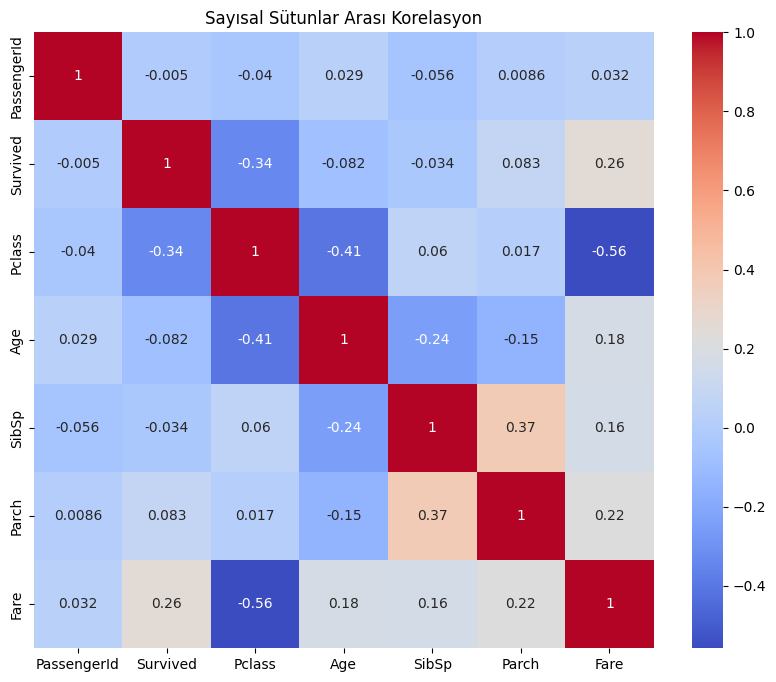

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal sütunları al
numeric_cols = full_data.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Sayısal Sütunlar Arası Korelasyon")
plt.show()


In [25]:
#pclass ve sibsp kullanarak age doldurmak istiyorum
full_data.groupby(['Pclass', 'SibSp'])['Age'].median()

Pclass  SibSp
1       0        38.0
        1        39.0
        2        47.0
        3        23.5
2       0        29.0
        1        29.0
        2        22.5
        3        30.0
3       0        25.0
        1        24.0
        2        19.5
        3         8.0
        4         7.0
        5        10.5
        8        14.5
Name: Age, dtype: float64

In [26]:
"""
Verideki tüm Pclass değerlerini sırayla dolaşır.
Her Pclass için farklı SibSp kombinasyonlarını da dolaşır.
Her Pclass ve SibSp kombinasyonu için Age'in medyanını hesaplar.
Age değeri eksik olan ve o Pclass + SibSp kombinasyonuna sahip satırları bulur. Yerine o kombinasyonun medyan değerini doldurur
"""
for pclass in full_data['Pclass'].unique():
    for sibsp in full_data['SibSp'].unique():
        median_age = full_data[(full_data['Pclass'] == pclass) & 
                               (full_data['SibSp'] == sibsp)]['Age'].median()

        mask = (full_data['Age'].isnull()) & \
               (full_data['Pclass'] == pclass) & \
               (full_data['SibSp'] == sibsp)

        full_data.loc[mask, 'Age'] = median_age


In [27]:
full_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

TÜM MİSSİNG VALUES DOLDURULDU

SIRADA FEATURE ENGİNEERİNG VAR

Kolon değerlerini (yani kategorik değişkenleri) sayısallaştırmamızın temel sebebi, çoğu makine öğrenimi algoritmasının yalnızca sayısal veriler üzerinde çalışabilmesidir.

In [28]:
full_data['Sex'].value_counts()

Sex
male      843
female    464
Name: count, dtype: int64

In [29]:
full_data = pd.get_dummies(full_data, columns=['Embarked','Sex'])


In [30]:
#NAME COLONUNDAN TİTLE OLUŞTURDUK VE EKLEDİK

nameslist = []
for i in full_data["Name"]:
    nameslist.append(i.split(".")[0].split(",")[-1].strip()) #Spector, Mr. Woolf	
full_data["Title"] = nameslist

In [31]:
full_data.Title.value_counts()

Title
Mr              757
Miss            259
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [32]:
#title'ı kategorik hale getirelim
#buradaki amaç nadir görülen unvanları gruplayarak modelin daha iyi genelleme yapmasını sağlamak
full_data["Title"]=full_data["Title"].replace(["Rev","Dr","Col","Major","Lady","Sir","Don","Capt","the Countess",
"Jonkheer","Dona"],"other")

In [33]:
#TİTLE ENCODE
templist = []
for i in full_data["Title"]:
    if i == "Master":
        templist.append(0)
    elif i in ["Miss", "Mlle", "Ms", "Mrs"]:
        templist.append(1)
    elif i == "Mr":
        templist.append(2)
    else:
        templist.append(3)

full_data["Title"] = templist


In [34]:
full_data.Title.value_counts()

Title
2    757
1    459
0     61
3     30
Name: count, dtype: int64

In [35]:
full_data = pd.get_dummies(full_data,columns=["Title"])
#Title değeri artık sayısal olduğu için modelin öğrenme algoritmaları (örneğin Random Forest, XGBoost) 
#bunu kullanabilecek.

# Age kategorizasyonu# 

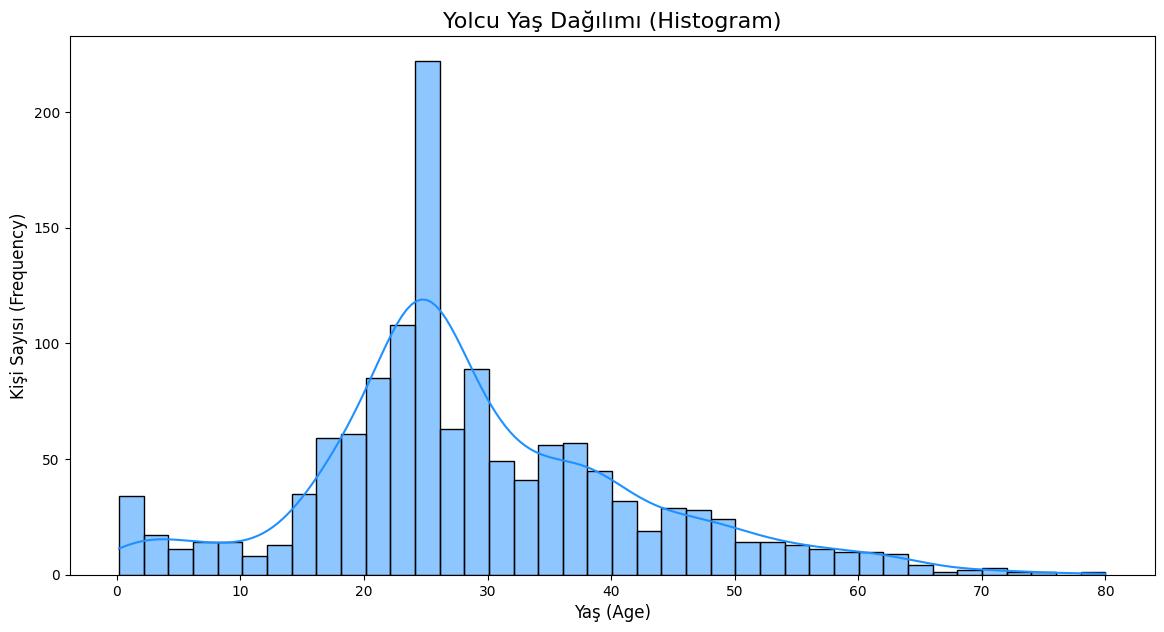

In [36]:
# Grafiğin boyutunu ayarlayalım
plt.figure(figsize=(14, 7))

# Seaborn kütüphanesinin histplot fonksiyonunu kullanarak histogramı çizdirelim
# kde=True parametresi, dağılımın genel şeklini gösteren bir yoğunluk çizgisi ekler.
# bins=40 parametresi, yaş aralıklarının sayısını (çubuk sayısını) belirler. Bu sayıyı değiştirerek daha dar veya geniş aralıklar oluşturabilirsiniz.
sns.histplot(data=full_data, x='Age', kde=True, bins=40, color='dodgerblue')

# Grafiğe başlık ve eksen isimleri ekleyelim
plt.title('Yolcu Yaş Dağılımı (Histogram)', fontsize=16)
plt.xlabel('Yaş (Age)', fontsize=12)
plt.ylabel('Kişi Sayısı (Frequency)', fontsize=12)

# Grafiği gösterelim
plt.show()


In [37]:
"""# Age kategorizasyonu
# Yaş aralıklarını kendinize göre ayarlayabilirsiniz
bins_age = [0, 12, 18, 60, np.inf] # Çocuk, Genç, Yetişkin, Yaşlı
labels_age = ['Child', 'Teenager', 'Adult', 'Elderly']
full_data['AgeGroup'] = pd.cut(full_data['Age'], bins=bins_age, labels=labels_age, right=False)

# One-Hot Encode AgeGroup
full_data = pd.get_dummies(full_data, columns=['AgeGroup'], prefix='Age')

# Orijinal Age sütununu atma (kategorik versiyonu kullandığımız için)
full_data = full_data.drop('Age', axis=1)


print("AgeGroup columns after one-hot encoding:")
print(full_data.filter(like='Age_').head())"""

'# Age kategorizasyonu\n# Yaş aralıklarını kendinize göre ayarlayabilirsiniz\nbins_age = [0, 12, 18, 60, np.inf] # Çocuk, Genç, Yetişkin, Yaşlı\nlabels_age = [\'Child\', \'Teenager\', \'Adult\', \'Elderly\']\nfull_data[\'AgeGroup\'] = pd.cut(full_data[\'Age\'], bins=bins_age, labels=labels_age, right=False)\n\n# One-Hot Encode AgeGroup\nfull_data = pd.get_dummies(full_data, columns=[\'AgeGroup\'], prefix=\'Age\')\n\n# Orijinal Age sütununu atma (kategorik versiyonu kullandığımız için)\nfull_data = full_data.drop(\'Age\', axis=1)\n\n\nprint("AgeGroup columns after one-hot encoding:")\nprint(full_data.filter(like=\'Age_\').head())'

#Fare Kategorizasyonu# 

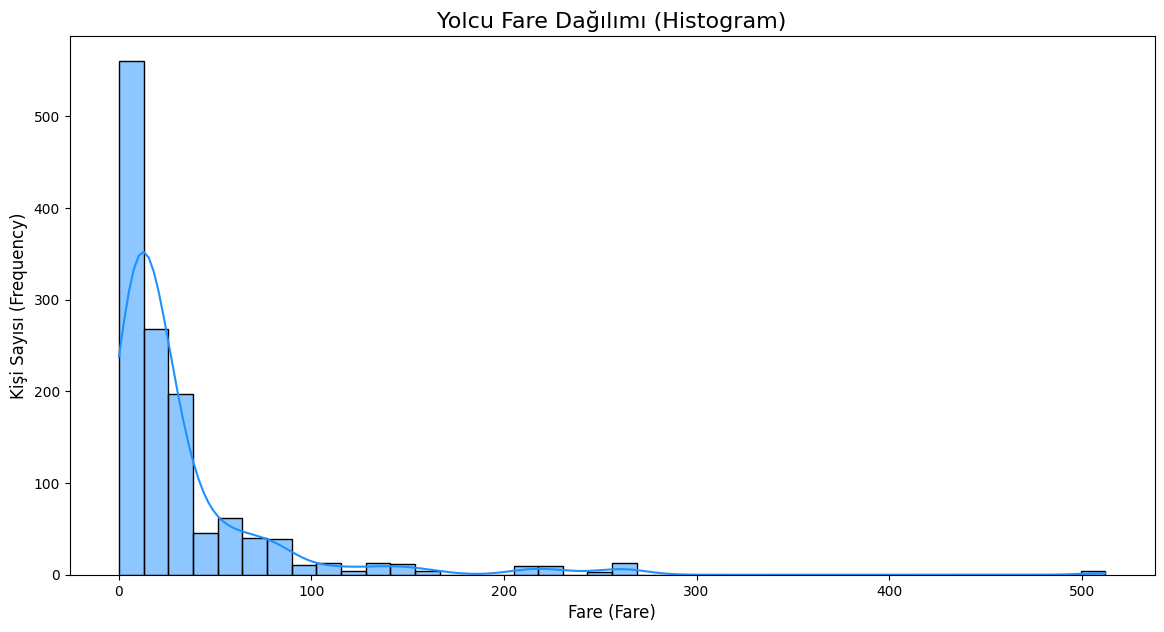

In [38]:
# Grafiğin boyutunu ayarlayalım
plt.figure(figsize=(14, 7))

# Seaborn kütüphanesinin histplot fonksiyonunu kullanarak histogramı çizdirelim
# kde=True parametresi, dağılımın genel şeklini gösteren bir yoğunluk çizgisi ekler.
# bins=40 parametresi, yaş aralıklarının sayısını (çubuk sayısını) belirler. Bu sayıyı değiştirerek daha dar veya geniş aralıklar oluşturabilirsiniz.
sns.histplot(data=full_data, x='Fare', kde=True, bins=40, color='dodgerblue')

# Grafiğe başlık ve eksen isimleri ekleyelim
plt.title('Yolcu Fare Dağılımı (Histogram)', fontsize=16)
plt.xlabel('Fare (Fare)', fontsize=12)
plt.ylabel('Kişi Sayısı (Frequency)', fontsize=12)

# Grafiği gösterelim
plt.show()


In [39]:
full_data['Fare'].quantile([0.25, 0.5, 0.75])

0.25     7.8958
0.50    14.4542
0.75    31.2750
Name: Fare, dtype: float64

In [40]:
"""# Fare kategorizasyonu
# Fiyat aralıklarını veri dağılımınıza göre ayarlayın
# Örneğin, çeyrekliklere bakarak aralıkları belirleyebilirsiniz: full_data['Fare'].quantile([0.25, 0.5, 0.75])
bins_fare = [-0.001, 7.91, 14.5, 32.0, np.inf] # Örneğin, 4 çeyreklik aralığa göre
labels_fare = ['Low', 'MidLow', 'MidHigh', 'High']
full_data['FareGroup'] = pd.cut(full_data['Fare'], bins=bins_fare, labels=labels_fare, right=True)

# One-Hot Encode FareGroup
full_data = pd.get_dummies(full_data, columns=['FareGroup'], prefix='Fare')

print("\nFareGroup columns after one-hot encoding:")
print(full_data.filter(like='Fare_').head())


# Orijinal Fare sütununu atma
full_data = full_data.drop('Fare', axis=1)"""

'# Fare kategorizasyonu\n# Fiyat aralıklarını veri dağılımınıza göre ayarlayın\n# Örneğin, çeyrekliklere bakarak aralıkları belirleyebilirsiniz: full_data[\'Fare\'].quantile([0.25, 0.5, 0.75])\nbins_fare = [-0.001, 7.91, 14.5, 32.0, np.inf] # Örneğin, 4 çeyreklik aralığa göre\nlabels_fare = [\'Low\', \'MidLow\', \'MidHigh\', \'High\']\nfull_data[\'FareGroup\'] = pd.cut(full_data[\'Fare\'], bins=bins_fare, labels=labels_fare, right=True)\n\n# One-Hot Encode FareGroup\nfull_data = pd.get_dummies(full_data, columns=[\'FareGroup\'], prefix=\'Fare\')\n\nprint("\nFareGroup columns after one-hot encoding:")\nprint(full_data.filter(like=\'Fare_\').head())\n\n\n# Orijinal Fare sütununu atma\nfull_data = full_data.drop(\'Fare\', axis=1)'

In [41]:
Q1 = full_data['Fare'].quantile(0.25)
Q3 = full_data['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Üst sınırdan büyük değerleri üst sınırla değiştir (clip)
full_data['Fare'] = full_data['Fare'].clip(lower=lower_bound, upper=upper_bound)


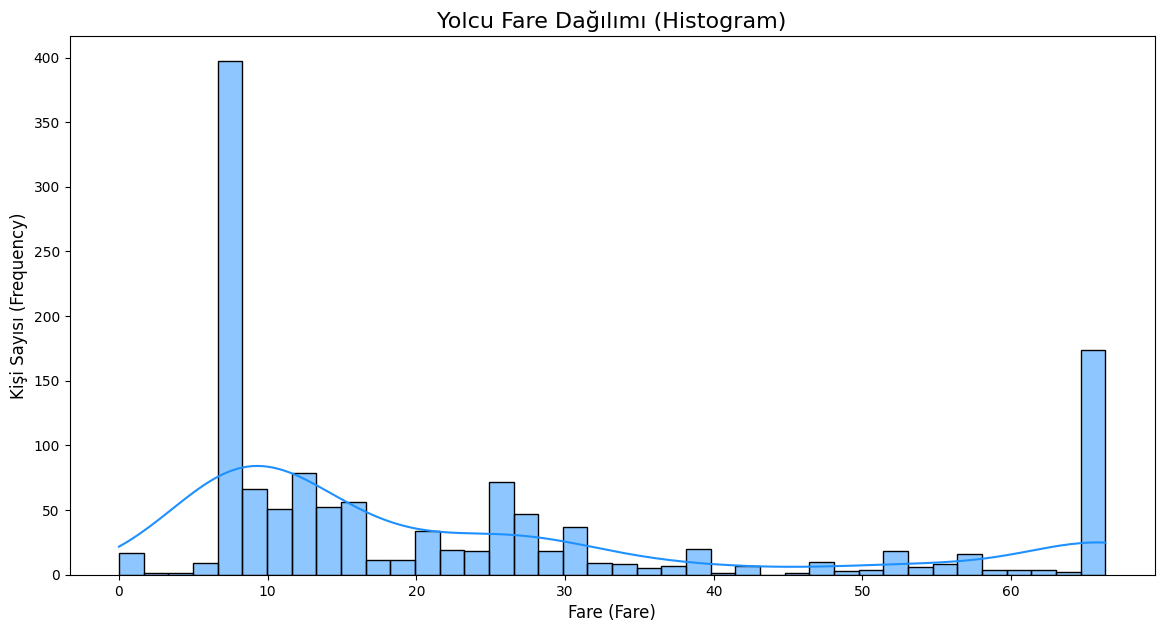

In [42]:
# Grafiğin boyutunu ayarlayalım
plt.figure(figsize=(14, 7))

# Seaborn kütüphanesinin histplot fonksiyonunu kullanarak histogramı çizdirelim
# kde=True parametresi, dağılımın genel şeklini gösteren bir yoğunluk çizgisi ekler.
# bins=40 parametresi, yaş aralıklarının sayısını (çubuk sayısını) belirler. Bu sayıyı değiştirerek daha dar veya geniş aralıklar oluşturabilirsiniz.
sns.histplot(data=full_data, x='Fare', kde=True, bins=40, color='dodgerblue')

# Grafiğe başlık ve eksen isimleri ekleyelim
plt.title('Yolcu Fare Dağılımı (Histogram)', fontsize=16)
plt.xlabel('Fare (Fare)', fontsize=12)
plt.ylabel('Kişi Sayısı (Frequency)', fontsize=12)

# Grafiği gösterelim
plt.show()


In [43]:
full_data["FamilySize"]=full_data["SibSp"] + full_data["Parch"] + 1


In [44]:
full_data["IsAlone"] = (full_data["FamilySize"] == 1)

In [45]:
"""bins_family = [0, 1, 4, 7, np.inf] # 0-1 (yalnız), 2-4 (küçük), 5-7 (orta), 8+ (büyük)
labels_family = ['Alone', 'Small', 'Medium', 'Large'] # FamilySize için yeni kategoriler
full_data['FamilyGroup'] = pd.cut(full_data['FamilySize'], bins=bins_family, labels=labels_family, right=False)

# One-Hot Encode FamilyGroup
full_data = pd.get_dummies(full_data, columns=['FamilyGroup'], prefix='FamCat')

"""

"bins_family = [0, 1, 4, 7, np.inf] # 0-1 (yalnız), 2-4 (küçük), 5-7 (orta), 8+ (büyük)\nlabels_family = ['Alone', 'Small', 'Medium', 'Large'] # FamilySize için yeni kategoriler\nfull_data['FamilyGroup'] = pd.cut(full_data['FamilySize'], bins=bins_family, labels=labels_family, right=False)\n\n# One-Hot Encode FamilyGroup\nfull_data = pd.get_dummies(full_data, columns=['FamilyGroup'], prefix='FamCat')\n\n"

In [46]:
full_data["FamilySize"] = [0 if i < 5 else 1 for i in full_data["FamilySize"]]

In [47]:
"""full_data = full_data.drop(['FamilySize', 'SibSp', 'Parch'], axis=1)"""
full_data = full_data.drop(['SibSp', 'Parch'], axis=1)

In [48]:
#pclass'ı one hot encode edelim
full_data = pd.get_dummies(full_data, columns=['Pclass'])

In [49]:
passid = full_data[full_data['Survived'].isnull()]["PassengerId"].astype(int)


In [50]:
full_data=full_data.drop(columns=["PassengerId","Name","Ticket"],axis=1)

In [51]:
#full_data splitten önceki son hali
full_data.dtypes

Survived      float64
Age           float64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
Sex_female       bool
Sex_male         bool
Title_0          bool
Title_1          bool
Title_2          bool
Title_3          bool
FamilySize      int64
IsAlone          bool
Pclass_1         bool
Pclass_2         bool
Pclass_3         bool
dtype: object

In [52]:
full_data

,Survived,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_0,Title_1,Title_2,Title_3,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.0,7.2500,False,False,True,False,True,False,False,True,False,0,False,False,False,True
1,1.0,38.0,66.3438,True,False,False,True,False,False,True,False,False,0,False,True,False,False
2,1.0,26.0,7.9250,False,False,True,True,False,False,True,False,False,0,True,False,False,True
3,1.0,35.0,53.1000,False,False,True,True,False,False,True,False,False,0,False,True,False,False
4,0.0,35.0,8.0500,False,False,True,False,True,False,False,True,False,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,25.0,8.0500,False,False,True,False,True,False,False,True,False,0,True,False,False,True
1305,NaN,39.0,66.3438,True,False,False,True,False,False,False,False,True,0,True,True,False,False
1306,NaN,38.5,7.2500,False,False,True,False,True,False,False,True,False,0,True,False,False,True
1307,NaN,25.0,8.0500,False,False,True,False,True,False,False,True,False,0,True,False,False,True


In [53]:
newtest=full_data[full_data["Survived"].isnull()]

newtest = newtest.drop(columns=["Survived"])

newtrain=full_data[full_data["Survived"].notnull()]


MODEL GELİŞTİRME AŞAMASI

In [54]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

In [55]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores= {}
preds={}

In [56]:

X_train = newtrain.drop(columns=["Survived"],axis=1)
y_train = newtrain["Survived"]
X_test=newtest


In [57]:
from sklearn.preprocessing import StandardScaler


GridSearchCV, bir modelin en iyi performans gösteren hiperparametre kombinasyonunu, belirlediğiniz bir aralıkta sistematik olarak arayan ve bunu Çapraz Doğrulama (Cross-Validation) ile test ederek bulan bir tekniktir.

In [58]:
"""# 1. Logistic Regression
print("\n--- Optimize Ediliyor: Logistic Regression ---")
logreg_param_grid = {
    'C': [ 5, 10, 20,50,100],
    'solver': ['liblinear'], # liblinear hem l1 hem l2 destekler, küçük verisetleri için iyidir.
    'penalty': ['l1', 'l2']
}
logreg_grid = GridSearchCV(estimator = LogisticRegression(max_iter=100, random_state=42), 
                           param_grid = logreg_param_grid, 
                           cv=kf, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=1)

logreg_grid.fit(X_train, y_train)

print(f"Logistic Regression için En İyi Parametreler: {logreg_grid.best_params_}")
print(f"Logistic Regression için En İyi Çapraz Doğrulama Skoru: {logreg_grid.best_score_:.4f}")

scores[logreg_grid.best_score_] = "LogisticRegression"
preds["LogisticRegression"] = logreg_grid.best_estimator_.predict(X_test)
"""

'# 1. Logistic Regression\nprint("\n--- Optimize Ediliyor: Logistic Regression ---")\nlogreg_param_grid = {\n    \'C\': [ 5, 10, 20,50,100],\n    \'solver\': [\'liblinear\'], # liblinear hem l1 hem l2 destekler, küçük verisetleri için iyidir.\n    \'penalty\': [\'l1\', \'l2\']\n}\nlogreg_grid = GridSearchCV(estimator = LogisticRegression(max_iter=100, random_state=42), \n                           param_grid = logreg_param_grid, \n                           cv=kf, \n                           scoring=\'accuracy\', \n                           n_jobs=-1, \n                           verbose=1)\n\nlogreg_grid.fit(X_train, y_train)\n\nprint(f"Logistic Regression için En İyi Parametreler: {logreg_grid.best_params_}")\nprint(f"Logistic Regression için En İyi Çapraz Doğrulama Skoru: {logreg_grid.best_score_:.4f}")\n\nscores[logreg_grid.best_score_] = "LogisticRegression"\npreds["LogisticRegression"] = logreg_grid.best_estimator_.predict(X_test)\n'

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

print("\n--- Optimize Ediliyor: Logistic Regression  ---")


# Parametre grid'i (clf__ ile başlar çünkü pipeline içindeki LogisticRegression'ın adı "clf")
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100], # Daha geniş C aralığı
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

# GridSearchCV
logreg_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=100, random_state=42), # Estimator artık pipeline nesnesi
    param_grid=logreg_param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Eğitimi ham X_train ile yap. Pipeline içindeki scaler, veriyi otomatik olarak ölçekleyecektir.
logreg_grid.fit(X_train, y_train)

# Sonuçlar
print(f"Logistic Regression için En İyi Parametreler: {logreg_grid.best_params_}")
print(f"Logistic Regression için En İyi Çapraz Doğrulama Skoru: {logreg_grid.best_score_:.4f}")


# VotingClassifier için hazır hale getir
scores[logreg_grid.best_score_] = "LogisticRegression"
preds["LogisticRegression"] = logreg_grid.best_estimator_.predict(X_test)



--- Optimize Ediliyor: Logistic Regression  ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Logistic Regression için En İyi Parametreler: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression için En İyi Çapraz Doğrulama Skoru: 0.8324


In [60]:
# 2. Random Forest
print("\n--- Optimize Ediliyor: Random Forest ---")
rf_param_grid = {
    'n_estimators': [220,250, 300], # Ağaç sayısı
    'max_depth': [6, 8],  # Ağacın maksimum derinliği (None: sınırsız)
    'min_samples_split': [2, 5, 10], # Bir düğümü bölmek için gereken minimum örnek sayısı
    'min_samples_leaf': [ 2, 3]   # Yaprak düğümde olması gereken minimum örnek sayısı
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                       rf_param_grid, 
                       cv=kf, #5
                       scoring='accuracy', 
                       n_jobs=-1, #tüm çekirdekleri kullan
                       verbose=1) #verilen bilgi
rf_grid.fit(X_train, y_train)

print(f"Random Forest için En İyi Parametreler: {rf_grid.best_params_}")
print(f"Random Forest için En İyi Çapraz Doğrulama Skoru: {rf_grid.best_score_:.4f}")

scores[rf_grid.best_score_] = "RandomForestClassifier"
preds["RandomForestClassifier"] = rf_grid.best_estimator_.predict(X_test)



--- Optimize Ediliyor: Random Forest ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest için En İyi Parametreler: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}
Random Forest için En İyi Çapraz Doğrulama Skoru: 0.8313


In [61]:
# 4. XGBoost Classifier Taslak

print("\n--- Optimize Ediliyor: XGBoost ---")
xgb_param_grid = {
    'n_estimators': [27],# Toplam ağaç sayısı
    'learning_rate': [0.03],# Her adımda öğrenme oranı
    'max_depth': [6],# Ağaçların maksimum derinliği
    'subsample': [0.8, 1.0], # Eğitimde kullanılacak örnek oranı
    'colsample_bytree': [0.8, 1.0], # Her ağaçta kullanılacak sütun oranı
    'gamma': [1] # Yaprak oluşturmak için gerekli minimum iyileşme
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', 
                                          random_state=42, 
                                          use_label_encoder=False, 
                                          eval_metric='logloss'), 
                        xgb_param_grid, 
                        cv=kf, 
                        scoring='accuracy', 
                        n_jobs=-1, 
                        verbose=1)

xgb_grid.fit(X_train, y_train)

print(f"XGBoost için En İyi Parametreler: {xgb_grid.best_params_}")
print(f"XGBoost için En İyi Çapraz Doğrulama Skoru: {xgb_grid.best_score_:.4f}")

scores[xgb_grid.best_score_] = "XGBoostClassifier"
preds["XGBoostClassifier"] = xgb_grid.best_estimator_.predict(X_test)







--- Optimize Ediliyor: XGBoost ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
XGBoost için En İyi Parametreler: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 27, 'subsample': 0.8}
XGBoost için En İyi Çapraz Doğrulama Skoru: 0.8403


In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

best_logreg_model = logreg_grid.best_estimator_
best_rf_model = rf_grid.best_estimator_
best_xgb_model = xgb_grid.best_estimator_



estimators = [
    ('logreg', best_logreg_model),
    ('rf', best_rf_model),
    ('xgb', best_xgb_model),

]

eclf = VotingClassifier(
    estimators=estimators,
    voting='soft',
    n_jobs=-1
)

cv_scores = cross_val_score(eclf, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
ensemble_accuracy = cv_scores.mean()

eclf.fit(X_train, y_train)

print(f"VotingClassifier Test Seti Doğruluk Oranı: {ensemble_accuracy:.4f}")

# İsteğe bağlı: VotingClassifier'ı scores ve preds sözlüklerine ekleyebilirsiniz
scores[ensemble_accuracy] = "VotingClassifier_Ensemble"
preds["VotingClassifier_Ensemble"] = eclf.predict(X_test)

VotingClassifier Test Seti Doğruluk Oranı: 0.8245


In [63]:
most_acc = max(scores.keys())
bestmodel=scores[most_acc]
print("******************************************")
print()
print(f"scores are : {scores}")
print()
print(f"most accurate model is {bestmodel} with accuracy : {most_acc}")
print()
print("******************************************")
final_preds = preds[bestmodel]


******************************************

scores are : {0.8324192217355424: 'LogisticRegression', 0.83126388624389: 'RandomForestClassifier', 0.8402780422776613: 'XGBoostClassifier', 0.8245477051990097: 'VotingClassifier_Ensemble'}

most accurate model is XGBoostClassifier with accuracy : 0.8402780422776613

******************************************


In [64]:
final_df = pd.DataFrame(
    {
        "PassengerId" : passid ,
        "Survived" : eclf.predict(X_test).astype(int) #final_preds.astype(int)
        
    }
)
final_df.to_csv('submission.csv', index=False)
final_df

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0
